In [2]:
from sklearn import linear_model
import itertools as it

from copy import deepcopy
%matplotlib inline

import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [21]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [23]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

##Find the linear regression equation for this data.

---



In [24]:
ground_temp = df[['Ground Temperature']]
chirps_sec = df['Chirps/Second']

regr_gc = linear_model.LinearRegression()
regr_gc.fit(ground_temp, chirps_sec)

LinearRegression()

In [25]:
print(f'Linear Regression Equation: y = {regr_gc.coef_[0]:.3f} * x + {regr_gc.intercept_:.3f}')

Linear Regression Equation: y = 0.203 * x + 0.459


###CHART


---


The original data and the equation on the chart.

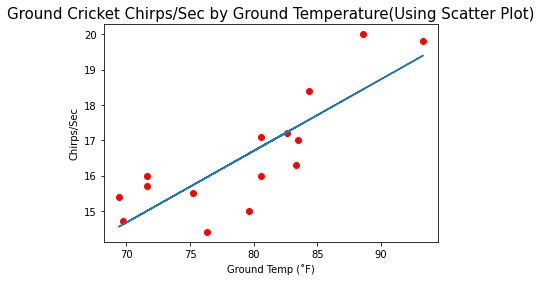

In [26]:
plt.scatter(ground_temp, chirps_sec, color='red')
plt.plot(ground_temp, regr_gc.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature(Using Scatter Plot)',fontsize=15)
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [27]:
print(f'R^2 score for this equation: {(regr_gc.score(ground_temp, chirps_sec)):.3f}')

R^2 score for this equation: 0.692


This is below 0.8, this is not a good fit.

##Extrapolate data: If the ground temperature reached 95

In [33]:
print(f'At 95˚F, our approximation of chirps/sec is: {regr_gc.predict([[95]])}\n')

At 95˚F, our approximation of chirps/sec is: [19.74428913]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##Interpolate data:


---

With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second

In [34]:
def chirps_to_temp(y):
    ret = (y - regr_gc.intercept_) / regr_gc.coef_[0]
    print(f'With an observation of {y} chirps/sec, we expect a ground temp of {(ret):.2f}˚F')

chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [39]:
df = pd.read_fwf("/content/brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


##Tasks


---


Find the linear regression equation for this data for brain weight to body weight.

In [40]:
regr_bb = linear_model.LinearRegression()
body = df[['Body']]
brain = df['Brain']
regr_bb.fit(body, brain)

LinearRegression()

In [44]:
print(f'Linear Regression Equation: y = {(regr_bb.coef_[0]):.3f} * x + {(regr_bb.intercept_):.3f}')

Linear Regression Equation: y = 0.903 * x + -56.856


##Task

---

Chart the original data and the equation on the chart.

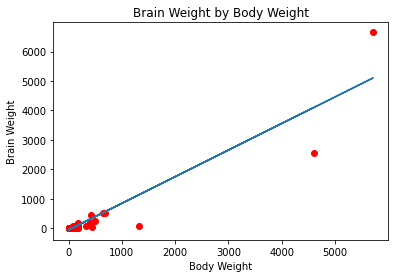

In [45]:
plt.scatter(body, brain, color='red')
plt.plot(body, regr_bb.predict(body))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

##Tasks


---

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [46]:
print(f'R^2 score for this equation: {(regr_bb.score(body, brain)):.3f}')

R^2 score for this equation: 0.873


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [47]:
df = pd.read_fwf("/content/salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [48]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [49]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

##Tasks

---

Find the linear regression equation for this data using columns 1-5 to column 6.

In [52]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [58]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]

    salary = df['Salary']
    
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    
    print(f'The equation for columns {salary_discrim_cols} with respect to Salary:\n{regr_sd.coef_} + {regr_sd.intercept_}')

In [68]:
lin_reg_eq_print(salary_discrim_cols, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


##Tasks

---

Find the selection of columns with the best  R2  score.

In [69]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]

    focus_output = df[focus]
    
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    
    return regr_sd.score(input_cols, focus_output)


print(f'R^2 score for equation using all columns: {lin_reg_wrt_focus(salary_discrim_cols, df):.3f}')

R^2 score for equation using all columns: 0.855


In [71]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combos(salary_discrim_cols)


In [72]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)


[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

##Salary Discrimination, Task 2 Conclusion


---


The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85(as seen above)

However, although including all of the columns produces the highest  score, there are two dominant factors: Year and Rank. Just these two factors taken together have a score of 0.84.

##Salary Discrimination, Task 3


---


It is worth noting that Sex on its own has a score very close to zero (0.063), indicating that it has no direct influence on salary.

In [73]:
num_by_sex = df.Sex.value_counts()
print(f'Num men: {num_by_sex[0]}\nNum women: {num_by_sex[1]}')

Num men: 38
Num women: 14


#Salary Discrimination Conclusion


---


###-->Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. There is no salary discrimination by Sex.

